# Paleogeography Analysis

**IMPORTANT NOTE:** this Jupyter notebook requires a Python 2 kernel!

It uses pygplates to analyze the paleogeography of continents, LIPs, and ophiolites through the Tonian.

Analysis of results obtained in this notebook are made in the `Seawater_Model.ipynb` notebook.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Paleogeography-Analysis" data-toc-modified-id="Paleogeography-Analysis-1">Paleogeography Analysis</a></span><ul class="toc-item"><li><span><a href="#Standard-Modules" data-toc-modified-id="Standard-Modules-1.1">Standard Modules</a></span></li><li><span><a href="#Other-Modules" data-toc-modified-id="Other-Modules-1.2">Other Modules</a></span></li><li><span><a href="#Custom-Functions" data-toc-modified-id="Custom-Functions-1.3">Custom Functions</a></span></li><li><span><a href="#Shapefiles" data-toc-modified-id="Shapefiles-1.4">Shapefiles</a></span><ul class="toc-item"><li><span><a href="#Cratons" data-toc-modified-id="Cratons-1.4.1">Cratons</a></span></li><li><span><a href="#LIPs" data-toc-modified-id="LIPs-1.4.2">LIPs</a></span></li><li><span><a href="#Arc-Accretion" data-toc-modified-id="Arc-Accretion-1.4.3">Arc Accretion</a></span></li></ul></li><li><span><a href="#.rot-Files" data-toc-modified-id=".rot-Files-1.5">.rot Files</a></span></li><li><span><a href="#Demonstration-of-the-Method-at-750-Ma" data-toc-modified-id="Demonstration-of-the-Method-at-750-Ma-1.6">Demonstration of the Method at 750 Ma</a></span><ul class="toc-item"><li><span><a href="#The-Reconstruction" data-toc-modified-id="The-Reconstruction-1.6.1">The Reconstruction</a></span></li><li><span><a href="#Plot-the-Reconstruction" data-toc-modified-id="Plot-the-Reconstruction-1.6.2">Plot the Reconstruction</a></span></li><li><span><a href="#Areas-in-Each-Latitude-Band" data-toc-modified-id="Areas-in-Each-Latitude-Band-1.6.3">Areas in Each Latitude Band</a></span></li><li><span><a href="#Plot-the-Area-Polygons-that-were-Pulled-Out" data-toc-modified-id="Plot-the-Area-Polygons-that-were-Pulled-Out-1.6.4">Plot the Area Polygons that were Pulled Out</a></span></li><li><span><a href="#Inspect-the-Calculated-Areas" data-toc-modified-id="Inspect-the-Calculated-Areas-1.6.5">Inspect the Calculated Areas</a></span></li></ul></li><li><span><a href="#Method-at-Multiple-Reconstruction-Times" data-toc-modified-id="Method-at-Multiple-Reconstruction-Times-1.7">Method at Multiple Reconstruction Times</a></span><ul class="toc-item"><li><span><a href="#Refresh-Switch" data-toc-modified-id="Refresh-Switch-1.7.1">Refresh Switch</a></span></li><li><span><a href="#Constants-Through-All-Models" data-toc-modified-id="Constants-Through-All-Models-1.7.2">Constants Through All Models</a></span></li><li><span><a href="#Model-Calculations" data-toc-modified-id="Model-Calculations-1.7.3">Model Calculations</a></span></li><li><span><a href="#LIP-Emplacement-Tracking" data-toc-modified-id="LIP-Emplacement-Tracking-1.7.4">LIP Emplacement Tracking</a></span></li><li><span><a href="#Arc-Accretion-Tracking" data-toc-modified-id="Arc-Accretion-Tracking-1.7.5">Arc Accretion Tracking</a></span></li><li><span><a href="#Scale-the-Craton-Areas" data-toc-modified-id="Scale-the-Craton-Areas-1.7.6">Scale the Craton Areas</a></span></li><li><span><a href="#Linear-Interpolation-Between-Model-Timesteps" data-toc-modified-id="Linear-Interpolation-Between-Model-Timesteps-1.7.7">Linear Interpolation Between Model Timesteps</a></span></li><li><span><a href="#Absolute-Zonal-Craton-and-LIP-Distribution-Through-Time" data-toc-modified-id="Absolute-Zonal-Craton-and-LIP-Distribution-Through-Time-1.7.8">Absolute Zonal Craton and LIP Distribution Through Time</a></span></li></ul></li></ul></li></ul></div>

## Standard Modules

Import standard modules included in most Python 2 distributions:

In [1]:
import numpy as np
from numpy.core.umath_tests import inner1d
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  


## Other Modules

The following modules are not typically included in a Python 2 distribution, and so must be installed separately:

In [2]:
import pygplates
import cartopy
import cartopy.crs as ccrs
from shapely.geometry.polygon import Polygon

from tqdm import tqdm_notebook

from netCDF4 import Dataset

## Custom Functions

`Paleogeography_Analysis_Functions.py` includes all functions imported below.
    
The reader is referred to the commented file for details on implementation.

In [3]:
from Paleogeography_Analysis_Functions import lat_lon_2_cart
from Paleogeography_Analysis_Functions import cart_2_lat_lon
from Paleogeography_Analysis_Functions import fast_cross
from Paleogeography_Analysis_Functions import cross_and_normalize
from Paleogeography_Analysis_Functions import intersection
from Paleogeography_Analysis_Functions import plot_reconstruction
from Paleogeography_Analysis_Functions import check_polygon_in_band
from Paleogeography_Analysis_Functions import get_area_in_band
from Paleogeography_Analysis_Functions import plot_polygons
from Paleogeography_Analysis_Functions import get_areas_in_bands
from Paleogeography_Analysis_Functions import get_LIP_areas_in_bands
from Paleogeography_Analysis_Functions import lat_from_pole

## Shapefiles

### Cratons

In [4]:
craton_root = 'Inputs/'
craton_gpmls = []

Laurentia_1000 = craton_root + '1000_Laurentia_Outline.gpml'
craton_gpmls.append(Laurentia_1000)
Amazonia_2201 = craton_root + '2201_Amazonia_Outline.gpml'
craton_gpmls.append(Amazonia_2201)
Sao_Francisco_2204 = craton_root + '2204_Sao_Francisco_Outline.gpml'
craton_gpmls.append(Sao_Francisco_2204)
Baltica_3000 = craton_root + '3000_Baltica_Outline.gpml'
craton_gpmls.append(Baltica_3000)
Siberia_4300 = craton_root + '4300_Siberia_Outline.gpml'
craton_gpmls.append(Siberia_4300)
India_5501 = craton_root + '5501_India_Outline.gpml'
craton_gpmls.append(India_5501)
North_China_6003 = craton_root + '6003_North_China_Outline.gpml'
craton_gpmls.append(North_China_6003)
Cathaysia_6601 = craton_root + '6601_Cathaysia_Outline.gpml'
craton_gpmls.append(Cathaysia_6601)
Yangtze_6603 = craton_root + '6603_Yangtze_Outline.gpml'
craton_gpmls.append(Yangtze_6603)
Congo_7701 = craton_root + '7701_Congo_Outline.gpml'
craton_gpmls.append(Congo_7701)
Kalahari_7702 = craton_root + '7702_Kalahari_Outline.gpml'
craton_gpmls.append(Kalahari_7702)
West_Africa_7703 = craton_root + '7703_West_Africa_Outline.gpml'
craton_gpmls.append(West_Africa_7703)
South_Australia_8001 = craton_root + '8001_South_Australia_Outline.gpml'
craton_gpmls.append(South_Australia_8001)
North_Australia_8004 = craton_root + '8004_North_Australia_Outline.gpml'
craton_gpmls.append(North_Australia_8004)
Mawson_8803 = craton_root + '8803_Mawson_Outline.gpml'
craton_gpmls.append(Mawson_8803)

craton_feature_collection = pygplates.FeatureCollection.read(craton_gpmls)

### LIPs

In [5]:
LIP_root = 'Inputs/'

LIP_gpmls = [LIP_root + 'Ernst2017_LIPs_700.gpml']

LIP_feature_collection = pygplates.FeatureCollection.read(LIP_gpmls)

### Arc Accretion

In [6]:
AA_gpmls = ['Inputs/Neopro_Arc_Accretion.gpml']

AA_feature_collection = pygplates.FeatureCollection.read(AA_gpmls)

## .rot Files

In [7]:
Rodinia_Model = 'Inputs/Rodinia_Model.rot'

## Demonstration of the Method at 750 Ma

### The Reconstruction

In [8]:
# input parameters
t = 750     #reconstruction time
anchor = 0  #anchor plate ID

# carry out the reconstruction for the cratons
reconstructed_cratons = []
pygplates.reconstruct(craton_feature_collection, Rodinia_Model, reconstructed_cratons, t, anchor)

# carry out the reconstruction for the LIPs
reconstructed_LIPs = []
pygplates.reconstruct(LIP_feature_collection, Rodinia_Model, reconstructed_LIPs, t, anchor)

### Plot the Reconstruction

Note: cratons that cross the E/W map boundaries do not plot correctly with the current implementation of the plotting function.

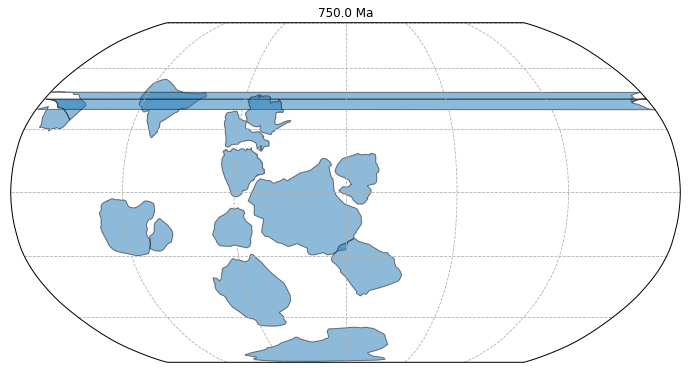

In [9]:
# just the cratons
fig = plot_reconstruction([reconstructed_cratons], ['C0'], lon_0=180)
plt.show(fig)

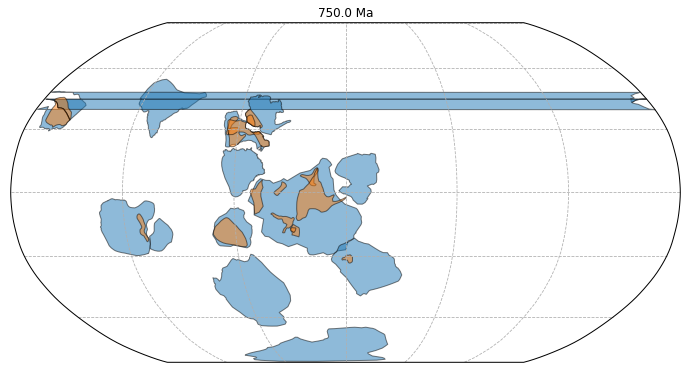

In [10]:
# cratons and LIPs
fig = plot_reconstruction([reconstructed_cratons, reconstructed_LIPs], ['C0','C1'], lon_0=180)
plt.show(fig)

### Areas in Each Latitude Band

In [11]:
# create the latitude bands
band_width = 10
lat_mins = np.arange(-90           , 90           , band_width)
lat_maxs = np.arange(-90+band_width, 90+band_width, band_width)

# perform the calculations for cratons
areas_cratons, area_polygons_cratons = get_areas_in_bands(reconstructed_cratons, lat_mins, lat_maxs)

# perform the calculations for LIPs
# (for this demonstration at 750Ma we ignore weathering, since it can only be calculated iteratively)
areas_LIPs, area_polygons_LIPs = get_areas_in_bands(reconstructed_LIPs, lat_mins, lat_maxs)

### Plot the Area Polygons that were Pulled Out

If we reproduce the original reconstruction here, we have demonstrated that all parts of all landmasses have been accounted for in our calculations.

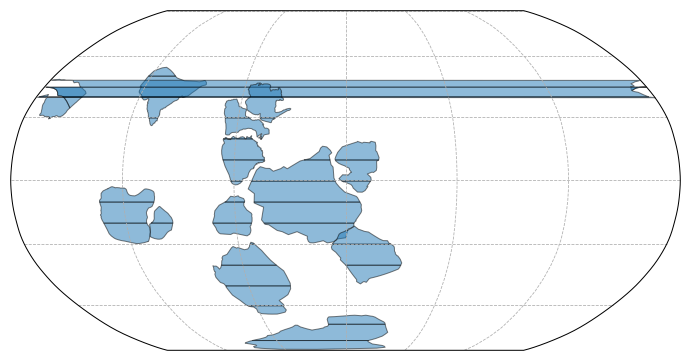

In [12]:
# cratons
fig, ax_map = plot_polygons(area_polygons_cratons, 'C0', lon_0=180)
plt.show(fig)

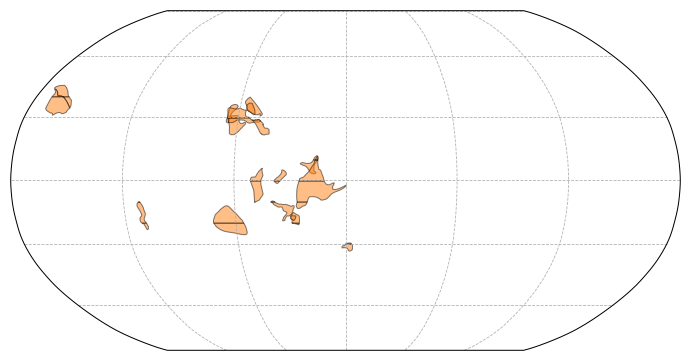

In [13]:
# LIPs
fig, ax_map = plot_polygons(area_polygons_LIPs, 'C1', lon_0=180)
plt.show(fig)

### Inspect the Calculated Areas

Note that for this demonstration at 750Ma we ignore weathering of LIPs, since it can only be calculated iteratively. Thus LIPs used here have persisted since time of emplacement.

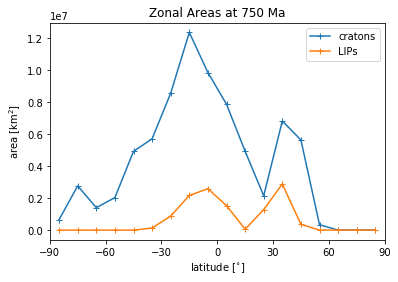

In [14]:
cols = ['area_km2','minimum_latitude','maximum_latitude']

df_cratons = pd.DataFrame({'minimum_latitude':lat_mins, 'maximum_latitude':lat_maxs, 'area_km2':areas_cratons})
df_cratons = df_cratons[cols]

df_LIPs = pd.DataFrame({'minimum_latitude':lat_mins, 'maximum_latitude':lat_maxs, 'area_km2':areas_LIPs})
df_LIPs = df_LIPs[cols]

fig, ax = plt.subplots()
ax.plot((df_cratons['minimum_latitude']+(df_cratons['maximum_latitude']-df_cratons['minimum_latitude'])/2), \
        df_cratons['area_km2'], '+-', label='cratons', c='C0')
ax.plot((df_LIPs['minimum_latitude']+(df_LIPs['maximum_latitude']-df_LIPs['minimum_latitude'])/2), \
        df_LIPs['area_km2'], '+-', label='LIPs', c='C1')
ax.set_xlabel('latitude [$^{\circ}$]')
ax.set_ylabel('area [km$^{2}$]')
ax.set_xlim(-90,90)
ax.set_xticks([-90,-60,-30,0,30,60,90])
ax.set_title('Zonal Areas at 750 Ma')
ax.legend()
plt.show(fig)

## Method at Multiple Reconstruction Times

### Refresh Switch

Computation time for pygplates reconstructions is relatively high. If we only want to play with the data analysis, we can read in past model calculations instead of re-calculating the models.

In [15]:
# the refresh switch
refresh = False

In [16]:
# read in files if desired
if refresh:
    print 'Refresh is set to True. Calculations will be performed, and new data files will be created.'
else:
    calc_areas_cratons = pd.read_csv('calc_areas_cratons.csv')
    calc_areas_LIPs = pd.read_csv('calc_areas_LIPs.csv')
    calc_areas_LIPs_decay = pd.read_csv('calc_areas_LIPs_decay.csv')
    calc_areas_LIPs_cover = pd.read_csv('calc_areas_LIPs_cover.csv')
    LIP_emplacement = pd.read_csv('LIP_emplacement.csv',index_col=0)
    arc_accretion = pd.read_csv('arc_accretion.csv',index_col=0)
    more_cratons = pd.read_csv('cratons.csv')
    more_LIPs = pd.read_csv('LIPs.csv')
    print 'Refresh is set to False. Calculations will not be performed, and existing files will be read in.'

Refresh is set to False. Calculations will not be performed, and existing files will be read in.


### Constants Through All Models

In [17]:
# time resolution
t_step = -1

# some assumptions of LIP characteristics
halflife = [100]
covered_LIP_names = ['Keweenawan']
cover_thresh = [1109-1085]

# create the latitude bands
# band_width must be a factor of 90
band_width = 10
lat_mins = np.arange(-90           , 90           , band_width)
lat_maxs = np.arange(-90+band_width, 90+band_width, band_width)
lat_mids = lat_mins + (lat_maxs-lat_mins)/2

### Model Calculations

In [18]:
# set up the time vector
t_start = 1270
t_stop = 0
ts = np.arange(t_start, t_stop+t_step, t_step)

if refresh:
    # initialize storage dataframes
    calc_areas_cratons = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})
    
    calc_areas_LIPs = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})
    calc_areas_LIPs_decay = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})
    calc_areas_LIPs_cover = pd.DataFrame({'lat_mins':lat_mins, 'lat_maxs':lat_maxs, 'lat_mids':lat_mids})

    # iterate through the time vector
    for i in tqdm_notebook(range(len(ts))):

        # carry out the reconstruction
        reconstructed_cratons = []
        pygplates.reconstruct(craton_gpmls, Rodinia_Model, reconstructed_cratons, ts[i], 0)
        reconstructed_LIPs = []
        pygplates.reconstruct(LIP_gpmls, Rodinia_Model, reconstructed_LIPs, ts[i], 0)

        # perform the calculations
        areas_cratons, area_polygons_cratons = get_areas_in_bands(reconstructed_cratons, lat_mins, lat_maxs)

        areas_LIPs, area_polygons_LIPs, areas_LIPs_decay, areas_LIPs_cover = \
            get_LIP_areas_in_bands(reconstructed_LIPs, lat_mins, lat_maxs,
                                   halflife, cover_thresh, covered_LIP_names)

        # store results
        calc_areas_cratons['area_km2_' + str(ts[i])] = areas_cratons
        
        calc_areas_LIPs['area_km2_' + str(ts[i])] = areas_LIPs
        calc_areas_LIPs_decay['area_km2_' + str(ts[i])] = areas_LIPs_decay[0]
        calc_areas_LIPs_cover['area_km2_' + str(ts[i])] = areas_LIPs_cover[0]

### LIP Emplacement Tracking

In [19]:
t_start_emplacement = 1270
t_stop_emplacement = 700
ts_emplacement = np.arange(t_start_emplacement, t_stop_emplacement+t_step, t_step)

if refresh:
    
    names = []
    emplacement_ages = []
    IDs = []
    for feature_collection in LIP_feature_collection:
        for feature in feature_collection:
            names.append(feature.get_name())
            emplacement_ages.append(feature.get_valid_time()[0])
            IDs.append(feature.get_feature_id())
                
    reconstructed_LIPs = []
    pygplates.reconstruct(LIP_gpmls, Rodinia_Model, reconstructed_LIPs, 0, 0)
    present_lats = []
    present_lons = []
    for j in range(len(reconstructed_LIPs)):
        ID = reconstructed_LIPs[j].get_feature().get_feature_id()
        present_lat, present_lon = reconstructed_LIPs[j].get_reconstructed_geometry().get_interior_centroid().to_lat_lon()
        present_lats.append(present_lat)
        present_lons.append(present_lon)
    
    LIP_emplacement = pd.DataFrame({'name':names,
                                    'emplacement_age':emplacement_ages,
                                    'present_lat':present_lats,
                                    'present_lon':present_lons},index=IDs)        
    
    # iterate through time steps
    for i in tqdm_notebook(range(len(ts_emplacement))):
        
        # reconstruct
        reconstructed_LIPs = []
        pygplates.reconstruct(LIP_gpmls, Rodinia_Model, reconstructed_LIPs, ts_emplacement[i], 0)
        
        # populate
        for j in range(len(reconstructed_LIPs)):
            
            # get area and lat at time of emplacement
            ID = reconstructed_LIPs[j].get_feature().get_feature_id()
            begin_age = reconstructed_LIPs[j].get_feature().get_valid_time()[0]
            if (begin_age<ts_emplacement[i]-t_step) and (begin_age>ts_emplacement[i]+t_step):
                area = reconstructed_LIPs[j].get_reconstructed_geometry().get_area() * 6371.009**2
                emplacement_lat = reconstructed_LIPs[j].get_reconstructed_geometry().get_interior_centroid().to_lat_lon()[0]
                LIP_emplacement.loc[ID, 'emplacement_area_km2'] = area
                LIP_emplacement.loc[ID, 'emplacement_lat'] = emplacement_lat
                
            # otherwise just track the lat
            centroid_lat = reconstructed_LIPs[j].get_reconstructed_geometry().get_interior_centroid().to_lat_lon()[0]    
            LIP_emplacement.loc[ID, 'lat_'+str(ts_emplacement[i])] = centroid_lat
    
    LIP_emplacement.sort_values(by='emplacement_age', inplace=True)
    LIP_emplacement.to_csv('LIP_emplacement.csv', index=True)

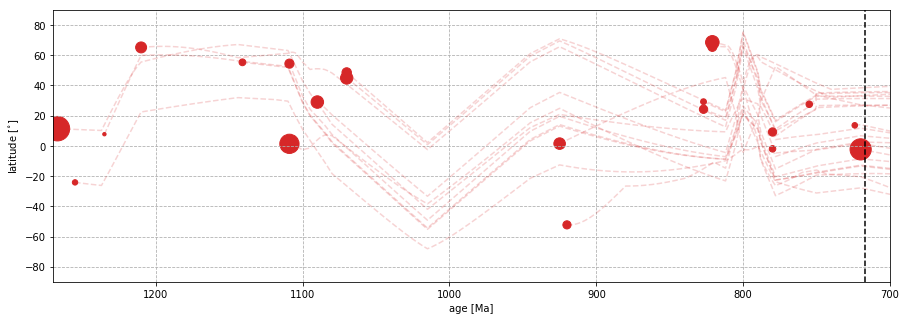

In [20]:
scatter_size = (LIP_emplacement['emplacement_area_km2']/np.max(LIP_emplacement['emplacement_area_km2']))*600

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(LIP_emplacement['emplacement_age'], LIP_emplacement['emplacement_lat'], s=scatter_size,c='#d62728')

for ID in LIP_emplacement.index:
    ax.plot(ts_emplacement[(len(ts_emplacement)-len(LIP_emplacement.loc[ID].values[6:])):],
            LIP_emplacement.loc[ID].values[6:], c='#d62728', alpha=0.2, ls='--')

ax.set_xlabel('age [Ma]')
ax.set_ylabel('latitude [$^{\circ}$]')
ax.set_ylim(-90,90)
ax.set_xlim(t_start_emplacement, t_stop_emplacement)
ax.axvline(717, c='k', ls='--')
ax.grid(ls='--')

plt.show(fig)

Check pygplates areas vs reported areas:

Hard coded values come from Ernst et al. (2014):

In [21]:
def compare_areas(LIP_name, Ernst_area):
    n = len(LIP_emplacement[LIP_emplacement['name']==LIP_name].index)
    if n==1:
        pygp_area = LIP_emplacement[LIP_emplacement['name']==LIP_name]['emplacement_area_km2'].values[0]
        print(LIP_name + ': ' + str(Ernst_area) + ' vs ' + str(np.round(pygp_area)) + ' km2. Difference of ' +\
              str(np.round(pygp_area-Ernst_area)) + ' km2 or ' +\
              str(np.round(((pygp_area-Ernst_area)/Ernst_area)*100)) + '%')
    else:
        pygp_area = 0
        for i in range(n):
            pygp_area = pygp_area + LIP_emplacement[LIP_emplacement['name']==LIP_name]['emplacement_area_km2'].values[i]
        print(LIP_name + ' (' + str(n) + ' parts)' + ': ' +\
              str(Ernst_area) + ' vs ' + str(np.round(pygp_area)) + ' km2. Difference of ' +\
              str(np.round(pygp_area-Ernst_area)) + ' km2 or ' +\
              str(np.round(((pygp_area-Ernst_area)/Ernst_area)*100)) + '%')

In [22]:
compare_areas('Franklin', 2.25e6)
compare_areas('Irkutsk', 0.13e6) #referred to as Dovyren-Kingash in Ernst
compare_areas('Mundine Well', 0.18e6)
compare_areas('Gunbarrel', 0.49e6)
compare_areas('SWCUC', 1.34e6) #effectively Guibei in Ernst
compare_areas('Willouran-Gairdner', 0.63e6)
compare_areas('Gangil-Mayumbia', 0.34e6)
compare_areas('Dashigou', 0.65e6)
compare_areas('Warakurna', 1.55e6)
compare_areas('SW Laurentia', 1.13e6)
compare_areas('Keweenawan', 0.41e6)
compare_areas('Umkondo', 2.08e6)
compare_areas('Abitibi', 0.26e6)
compare_areas('Marnda Moorn', 0.59e6)
compare_areas('Sudbury', 0.12e6)
compare_areas('CSDG', 0.14e6)
compare_areas('Mackenzie', 2.7e6)

Franklin: 2250000.0 vs 2231191.0 km2. Difference of -18809.0 km2 or -1.0%
Irkutsk: 130000.0 vs 154369.0 km2. Difference of 24369.0 km2 or 19.0%
Mundine Well: 180000.0 vs 210235.0 km2. Difference of 30235.0 km2 or 17.0%
Gunbarrel (2 parts): 490000.0 vs 550249.0 km2. Difference of 60249.0 km2 or 12.0%
SWCUC (2 parts): 1340000.0 vs 1325131.0 km2. Difference of -14869.0 km2 or -1.0%
Willouran-Gairdner (2 parts): 630000.0 vs 516003.0 km2. Difference of -113997.0 km2 or -18.0%
Gangil-Mayumbia: 340000.0 vs 332643.0 km2. Difference of -7357.0 km2 or -2.0%
Dashigou: 650000.0 vs 662517.0 km2. Difference of 12517.0 km2 or 2.0%
Warakurna (2 parts): 1550000.0 vs 1200675.0 km2. Difference of -349325.0 km2 or -23.0%
SW Laurentia: 1130000.0 vs 775585.0 km2. Difference of -354415.0 km2 or -31.0%
Keweenawan: 410000.0 vs 414118.0 km2. Difference of 4118.0 km2 or 1.0%
Umkondo: 2080000.0 vs 1845935.0 km2. Difference of -234065.0 km2 or -11.0%
Abitibi: 260000.0 vs 229382.0 km2. Difference of -30618.0 km2 or

Check that paleolatitudes coming out of the model match paleomagnetic data coming from the LIPs themselves when those poles exist.

In [23]:
def compare_paleolats(LIP_name, pole):
    n = len(LIP_emplacement[LIP_emplacement['name']==LIP_name].index)
    if n==1:
        centroid_lon = LIP_emplacement[LIP_emplacement['name']==LIP_name]['present_lon'].values[0]
        centroid_lat = LIP_emplacement[LIP_emplacement['name']==LIP_name]['present_lat'].values[0]
        lat = lat_from_pole(centroid_lon,centroid_lat,pole[0],pole[1])
        print(LIP_name + ': ' + str(np.round(lat)) + ' ± ' + str(pole[2]) + ' vs ' +\
              str(np.round(LIP_emplacement[LIP_emplacement['name']==LIP_name]['emplacement_lat'].values[0])))
    else:
        for i in range(n):
            centroid_lon = LIP_emplacement[LIP_emplacement['name']==LIP_name]['present_lon'].values[i]
            centroid_lat = LIP_emplacement[LIP_emplacement['name']==LIP_name]['present_lat'].values[i]
            lat = lat_from_pole(centroid_lon,centroid_lat,pole[0],pole[1])
            print(LIP_name + ' (part ' + str(i+1) + ')' + ': ' + str(np.round(lat)) + ' ± ' + str(pole[2]) + ' vs ' +\
                  str(np.round(LIP_emplacement[LIP_emplacement['name']==LIP_name]['emplacement_lat'].values[i])))

In [24]:
compare_paleolats('CSDG',[159.1,-1.8,3.41])#MEAN post-Jotnian intrusions (see Leirubakki compilation for details)
compare_paleolats('Mackenzie',[190.0,4.0,5.0])#Mackenzie dykes grand mean (see Leirubakki compilation for details)
compare_paleolats('Sudbury',[192.8,-2.5,2.5])#Sudbury Dykes Combined (see Leirubakki compilation for details)
compare_paleolats('Marnda Moorn',[143.9,-55.8,6.3])#Gnowangerup-Fraser dykes (see Leirubakki compilation for details)
compare_paleolats('Abitibi',[215.5,48.8,14.1])#Abitibi Dykes (see Leirubakki compilation for details)
compare_paleolats('Keweenawan',[203.4,42.3,3.7])#Osler upper pole (see Swanson-Hysell et al. 2018 for details)
compare_paleolats('Umkondo',[222.1,-64.0,2.6])#Umkondo Grand mean (Swanson-Hysell et al., 2015)
compare_paleolats('SW Laurentia',[185.0,32.0,8])#Cardenas Basalts and Intrusions (see Leirubakki compilation for details)
compare_paleolats('Warakurna',[95.0,33.8,8.3])#Bangemall Sills (see Leirubakki compilation for details)
compare_paleolats('SWCUC',[91.0,13.5,10.9])#Xiaofeng Dykes (see Leirubakki compilation for details)
compare_paleolats('Gunbarrel',[137.8,1.6,5.0])#Tsezotene Sills Combined (see Leirubakki compilation for details)
compare_paleolats('Mundine Well',[135.4,45.3,4.1])#Mundine Well Dykes Combined (see Leirubakki compilation for details)
compare_paleolats('Franklin',[162.1,6.7,3.0])#Franklin event grand mean (see Leirubakki compilation for details)

CSDG: -23.0 ± 3.41 vs -24.0
Mackenzie: 12.0 ± 5.0 vs 11.0
Sudbury: 1.0 ± 2.5 vs 8.0
Marnda Moorn: 60.0 ± 6.3 vs 65.0
Abitibi: 49.0 ± 14.1 vs 55.0
Keweenawan: 43.0 ± 3.7 vs 54.0
Umkondo: -2.0 ± 2.6 vs 1.0
SW Laurentia: 34.0 ± 8 vs 29.0
Warakurna (part 1): 25.0 ± 8.3 vs 45.0
Warakurna (part 2): 22.0 ± 8.3 vs 49.0
SWCUC (part 1): 69.0 ± 10.9 vs 69.0
SWCUC (part 2): 65.0 ± 10.9 vs 66.0
Gunbarrel (part 1): -13.0 ± 5.0 vs -2.0
Gunbarrel (part 2): -4.0 ± 5.0 vs 9.0
Mundine Well: 19.0 ± 4.1 vs 28.0
Franklin: -2.0 ± 3.0 vs -2.0


### Arc Accretion Tracking

In [25]:
if refresh:
    
    names = []
    IDs = []
    for feature_collection in AA_feature_collection:
        for feature in feature_collection:
            names.append(feature.get_name())
            IDs.append(feature.get_feature_id())
                
    reconstructed_AAs = []
    pygplates.reconstruct(AA_gpmls, Rodinia_Model, reconstructed_AAs, 0, 0)
    present_lats = []
    present_lons = []
    for j in range(len(reconstructed_AAs)):
        present_lat, present_lon = reconstructed_AAs[j].get_reconstructed_geometry().get_interior_centroid().to_lat_lon()
        present_lats.append(present_lat)
        present_lons.append(present_lon)
    
    arc_accretion = pd.DataFrame({'name':names,'present_lat':present_lats,'present_lon':present_lons},index=IDs)        
    
    # iterate through time steps
    for i in tqdm_notebook(range(len(ts_emplacement))):
        
        # reconstruct
        reconstructed_AAs = []
        pygplates.reconstruct(AA_gpmls, Rodinia_Model, reconstructed_AAs, ts_emplacement[i], 0)
        
        # populate
        for j in range(len(reconstructed_AAs)):
            
            # track the lat
            ID = reconstructed_AAs[j].get_feature().get_feature_id()
                
            centroid_lat = reconstructed_AAs[j].get_reconstructed_geometry().get_interior_centroid().to_lat_lon()[0]    
            arc_accretion.loc[ID, 'lat_'+str(ts_emplacement[i])] = centroid_lat
    
    arc_accretion.to_csv('arc_accretion.csv', index=True)

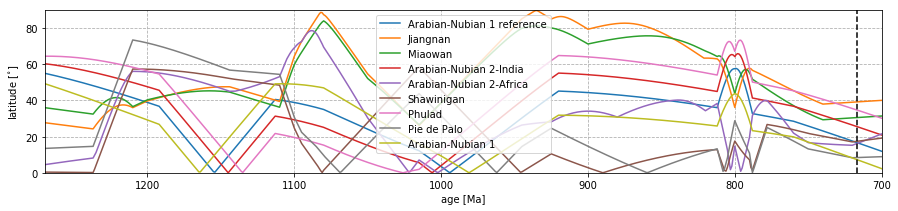

In [26]:
fig, ax = plt.subplots(figsize=(15,3))

for ID in arc_accretion.index:
    ax.plot(ts_emplacement[(len(ts_emplacement)-len(arc_accretion.loc[ID].values[3:])):],
            np.abs(arc_accretion.loc[ID].values[3:]), label=arc_accretion.loc[ID,'name'])

ax.set_xlabel('age [Ma]')
ax.set_ylabel('latitude [$^{\circ}$]')
ax.set_ylim(0,90)
ax.set_xlim(t_start_emplacement, t_stop_emplacement)
ax.legend()
ax.axvline(717, c='k', ls='--')
ax.grid(ls='--')

plt.show(fig)

### Scale the Craton Areas

To account for land missing from the GPlates model.

The `true_craton_area` value comes from Hawkesworth et al. (2006).

In [27]:
if refresh:
    # the true craton area
    true_craton_area = 1.2e8

    # scale
    for i in range(len(ts)):
        all_land = calc_areas_cratons['area_km2_' + str(ts[i])]
        craton_scale = true_craton_area / sum(all_land)
        for j in range(len(calc_areas_cratons.index)):
            calc_areas_cratons.loc[j,'area_km2_'+str(ts[i])] = \
            calc_areas_cratons['area_km2_'+str(ts[i])][j] * craton_scale

    # save all results to a .csv
    calc_areas_cratons.to_csv('calc_areas_cratons.csv', index=False)
    calc_areas_LIPs.to_csv('calc_areas_LIPs.csv', index=False)
    calc_areas_LIPs_decay.to_csv('calc_areas_LIPs_decay.csv', index=False)
    calc_areas_LIPs_cover.to_csv('calc_areas_LIPs_cover.csv', index=False)

### Linear Interpolation Between Model Timesteps

We linearly interpolate here because actually calculating the values at such a high resolution will be too computationally expensive.

In [28]:
if refresh:
    # seawater model time range and step
    dt = 0.1
    model_t = np.arange(1270,699,-1)

    # the cratons
    more_cratons = pd.DataFrame({'lat_maxs':calc_areas_cratons['lat_maxs'],
                                 'lat_mids':calc_areas_cratons['lat_mids'],
                                 'lat_mins':calc_areas_cratons['lat_mins']})
    for i in range(len(model_t)-1):
        more_cratons['area_km2_'+str(float(model_t[i]))] = calc_areas_cratons['area_km2_'+str(int(model_t[i]))]
        for j in range(len(calc_areas_cratons.index)):
            temp_row = np.linspace(calc_areas_cratons['area_km2_'+str(int(model_t[i]))][j],
                                   calc_areas_cratons['area_km2_'+str(int(model_t[i+1]))][j], 11)
            for k in range(len(temp_row)-2):
                more_cratons.loc[j,'area_km2_'+str(model_t[i]-dt*k-dt)] = temp_row[k+1]
    more_cratons['area_km2_'+str(float(700))] = calc_areas_cratons['area_km2_'+str(int(700))]
    more_cratons.to_csv('cratons.csv', index=False)

    # the LIPs
    more_LIPs = pd.DataFrame({'lat_maxs':calc_areas_LIPs['lat_maxs'],
                              'lat_mids':calc_areas_LIPs['lat_mids'],
                              'lat_mins':calc_areas_LIPs['lat_mins']})
    for i in range(len(model_t)-1):
        more_LIPs['area_km2_'+str(float(model_t[i]))] = calc_areas_LIPs['area_km2_'+str(int(model_t[i]))]
        for j in range(len(calc_areas_LIPs.index)):
            temp_row = np.linspace(calc_areas_LIPs['area_km2_'+str(int(model_t[i]))][j],
                                   calc_areas_LIPs['area_km2_'+str(int(model_t[i+1]))][j], 11)
            for k in range(len(temp_row)-2):
                more_LIPs.loc[j,'area_km2_'+str(model_t[i]-dt*k-dt)] = temp_row[k+1]
    more_LIPs['area_km2_'+str(float(700))] = calc_areas_LIPs['area_km2_'+str(int(700))]
    more_LIPs.to_csv('LIPs.csv', index=False)

### Absolute Zonal Craton and LIP Distribution Through Time

Calculate absolute latitudes and store in a new dataframe.

In [29]:
# initiate a new dataframe for absolute latitudes
num_bands = len(calc_areas_cratons.index)

calc_abs_areas_cratons = pd.DataFrame({'lat_maxs':calc_areas_cratons['lat_maxs'][(num_bands/2):],
                                       'lat_mids':calc_areas_cratons['lat_mids'][(num_bands/2):],
                                       'lat_mins':calc_areas_cratons['lat_mins'][(num_bands/2):]})
calc_abs_areas_cratons.reset_index(drop=True, inplace=True)

calc_abs_areas_LIPs = pd.DataFrame({'lat_maxs':calc_areas_LIPs['lat_maxs'][(num_bands/2):],
                                    'lat_mids':calc_areas_LIPs['lat_mids'][(num_bands/2):],
                                    'lat_mins':calc_areas_LIPs['lat_mins'][(num_bands/2):]})
calc_abs_areas_LIPs.reset_index(drop=True, inplace=True)

calc_abs_areas_LIPs_decay = pd.DataFrame({'lat_maxs':calc_areas_LIPs_decay['lat_maxs'][(num_bands/2):],
                                          'lat_mids':calc_areas_LIPs_decay['lat_mids'][(num_bands/2):],
                                          'lat_mins':calc_areas_LIPs_decay['lat_mins'][(num_bands/2):]})
calc_abs_areas_LIPs_decay.reset_index(drop=True, inplace=True)

calc_abs_areas_LIPs_cover = pd.DataFrame({'lat_maxs':calc_areas_LIPs_cover['lat_maxs'][(num_bands/2):],
                                          'lat_mids':calc_areas_LIPs_cover['lat_mids'][(num_bands/2):],
                                          'lat_mins':calc_areas_LIPs_cover['lat_mins'][(num_bands/2):]})
calc_abs_areas_LIPs_cover.reset_index(drop=True, inplace=True)

# iterate over the time steps
for i in range(len(ts)):
    # iterate over the bands: sum then store
    for j in range(num_bands/2):
        abs_area = calc_areas_cratons['area_km2_'+str(ts[i])][j]+\
                   calc_areas_cratons['area_km2_'+str(ts[i])][(num_bands-1)-j]
        calc_abs_areas_cratons.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts[i])]=abs_area
        
        abs_area = calc_areas_LIPs['area_km2_'+str(ts[i])][j]+\
                   calc_areas_LIPs['area_km2_'+str(ts[i])][(num_bands-1)-j]
        calc_abs_areas_LIPs.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts[i])]=abs_area
        
        abs_area = calc_areas_LIPs_decay['area_km2_'+str(ts[i])][j]+\
                   calc_areas_LIPs_decay['area_km2_'+str(ts[i])][(num_bands-1)-j]
        calc_abs_areas_LIPs_decay.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts[i])]=abs_area
        
        abs_area = calc_areas_LIPs_cover['area_km2_'+str(ts[i])][j]+\
                   calc_areas_LIPs_cover['area_km2_'+str(ts[i])][(num_bands-1)-j]
        calc_abs_areas_LIPs_cover.loc[((num_bands/2)-1)-j,'area_km2_'+str(ts[i])]=abs_area

# save the result to a .csv
calc_abs_areas_cratons.to_csv('calc_abs_areas_cratons.csv', index=False)
calc_abs_areas_LIPs.to_csv('calc_abs_areas_LIPs.csv', index=False)
calc_abs_areas_LIPs_decay.to_csv('calc_abs_areas_LIPs_decay.csv', index=False)
calc_abs_areas_LIPs_cover.to_csv('calc_abs_areas_LIPs_cover.csv', index=False)